In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from tqdm import tqdm  # Optional: for progress tracking
from src.utils.Contact_Matrix import create_contact_matrix, matrix_scaling
from src.utils.visualization.used import *

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde


In [2]:
df = pd.read_csv("data_homophily.csv")
df = df.dropna()

mask_distribution = extract_behavior_distribution(df, "masks")
test_distribution = extract_behavior_distribution(df, "testing")
vaccine_distribution = extract_behavior_distribution(df, "vacc")

mask_matrix = generate_contact_matrix(df, "masks")
test_matrix = generate_contact_matrix(df, "testing")
vaccine_matrix = generate_contact_matrix(df, "vacc")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


# bootstrap matherial

In [3]:
res_masks = bootstrap_pol_mean(df, "masks", n_bootstrap=50000)
res_testing = bootstrap_pol_mean(df, "testing", n_bootstrap=50000)
res_vacc = bootstrap_pol_mean(df, "vacc", n_bootstrap=50000)

Bootstrapping vacc: 100%|██████████| 50000/50000 [00:26<00:00, 1871.52it/s]


c:\users\nel_t\documents\work\projects\pol_hom\src\utils\visualization\used.py:1309: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


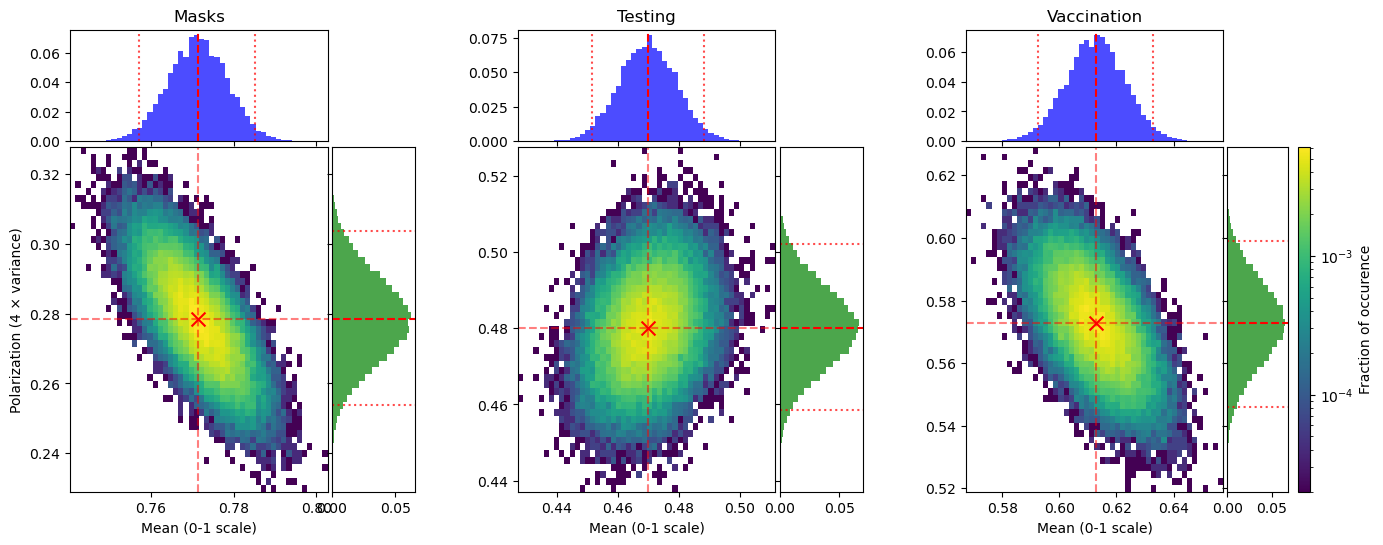

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpecFromSubplotSpec  # Add this import

# Combine all results into a single dictionary
results_dict = {
    "masks": res_masks,
    "testing": res_testing,
    "vacc": res_vacc
}

# Create the combined figure
fig = create_combined_behaviors_plot(
    results_dict,
    bins=50  # or any other value you prefer
)

# You can also save as PDF for even better quality
fig.savefig("figures/SI/combined_behaviors_joint_plot2.pdf", bbox_inches='tight')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\users\nel_t\documents\work\projects\pol_hom\src\utils\visualization\used.py:1500: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


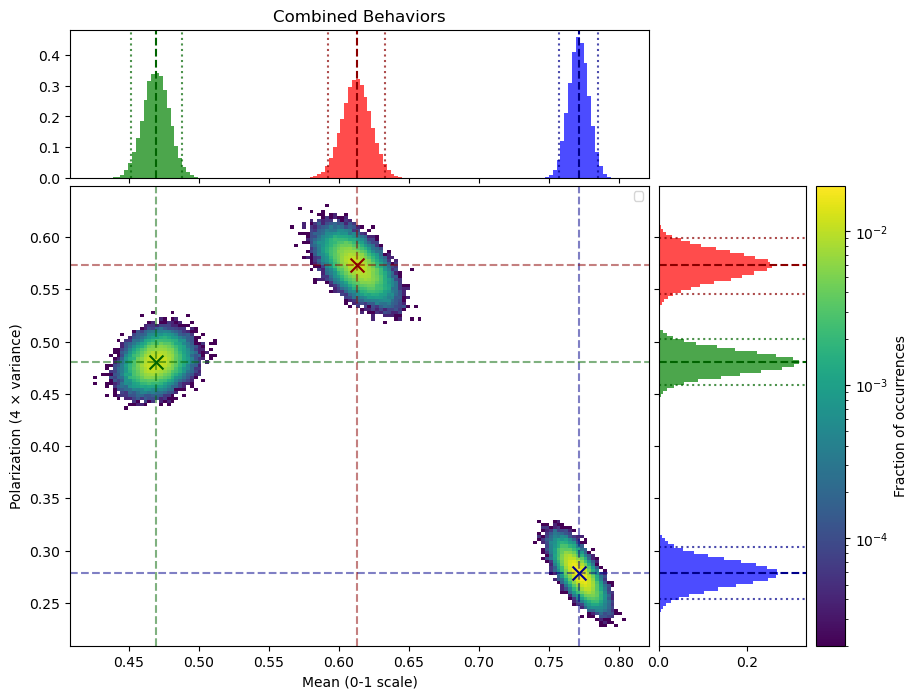

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde

# Combine all results into a single dictionary
results_dict = {
    "masks": res_masks,
    "testing": res_testing,
    "vacc": res_vacc
}

merged_data = merge_behavior_datasets(results_dict)

# Step 2: Plot the merged data (using simplified function)
fig = plot_merged_behaviors(
    merged_data,
    bins=150  # Only parameter you mentioned might change
)

fig.savefig("figures/SI/combined_behaviors_joint_plot.pdf", bbox_inches='tight')

plt.show()


# Matherial for the bootstrap of the homophily

In [6]:
boot_hom_masks = bootstrap_homophily(df, "masks", n_bootstrap=50000)
boot_hom_tests = bootstrap_homophily(df, "testing", n_bootstrap=50000)
boot_hom_vaccs = bootstrap_homophily(df, "vacc", n_bootstrap=50000)

Bootstrapping vacc: 100%|██████████| 50000/50000 [39:13<00:00, 21.24it/s]  


In [7]:
print(np.round(boot_hom_masks['mean_estimate'],2))
print(np.round(boot_hom_masks['ci'],2))
print(np.round(boot_hom_tests['mean_estimate'],2))
print(np.round(boot_hom_tests['ci'],2))
print(np.round(boot_hom_vaccs['mean_estimate'],2))
print(np.round(boot_hom_vaccs['ci'],2))



print(np.round(boot_hom_masks['ci'],2)[0], np.round(boot_hom_masks['mean_estimate'],2), np.round(boot_hom_masks['ci'],2)[1])
print(np.round(boot_hom_tests['ci'],2)[0], np.round(boot_hom_tests['mean_estimate'],2), np.round(boot_hom_tests['ci'],2)[1])
print(np.round(boot_hom_vaccs['ci'],2)[0], np.round(boot_hom_vaccs['mean_estimate'],2), np.round(boot_hom_vaccs['ci'],2)[1])


2.57
[2.22 2.93]
2.47
[2.27 2.68]
1.88
[1.72 2.07]
2.22 2.57 2.93
2.27 2.47 2.68
1.72 1.88 2.07


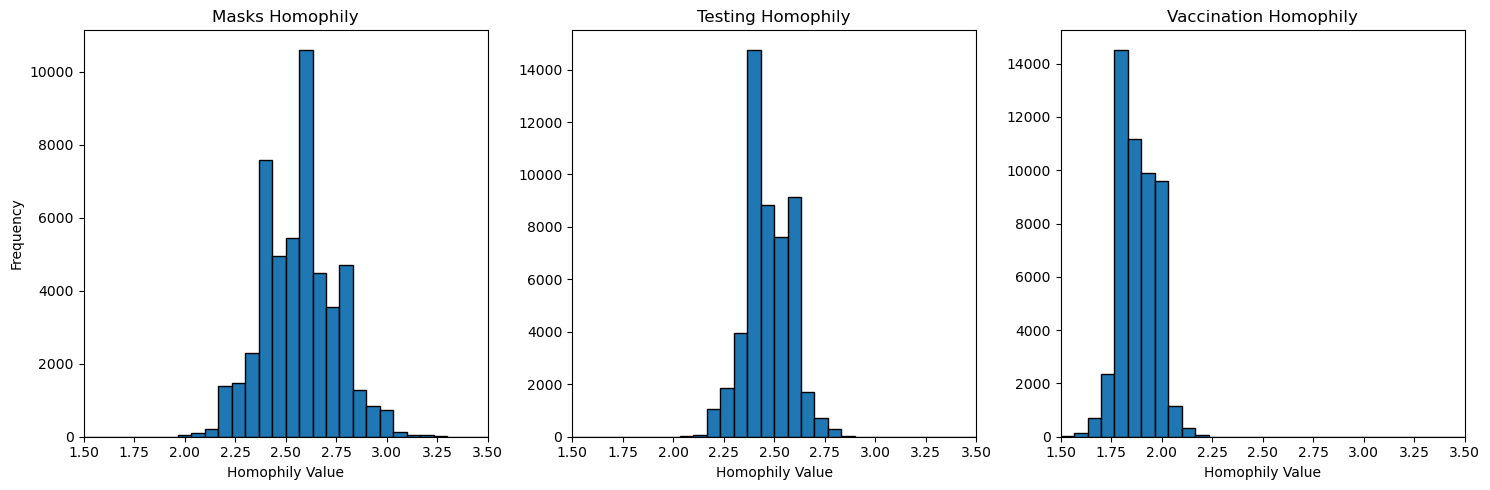

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the bootstrap values
masks_values = boot_hom_masks['bootstrap_homophily']
tests_values = boot_hom_tests['bootstrap_homophily']
vaccs_values = boot_hom_vaccs['bootstrap_homophily']

# Create figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define common bins from 1.5 to 3.5
bins = np.linspace(1.5, 3.5, 31)  # 20 bins between 1.5 and 3.5

# Plot histograms with the same bins
axs[0].hist(masks_values, bins=bins, edgecolor='black')
axs[0].set_title('Masks Homophily')
axs[0].set_xlabel('Homophily Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(tests_values, bins=bins, edgecolor='black')
axs[1].set_title('Testing Homophily')
axs[1].set_xlabel('Homophily Value')

axs[2].hist(vaccs_values, bins=bins, edgecolor='black')
axs[2].set_title('Vaccination Homophily')
axs[2].set_xlabel('Homophily Value')

# Ensure all plots have the same x-axis range
for ax in axs:
    ax.set_xlim(1.5, 3.5)

plt.tight_layout()
plt.show()


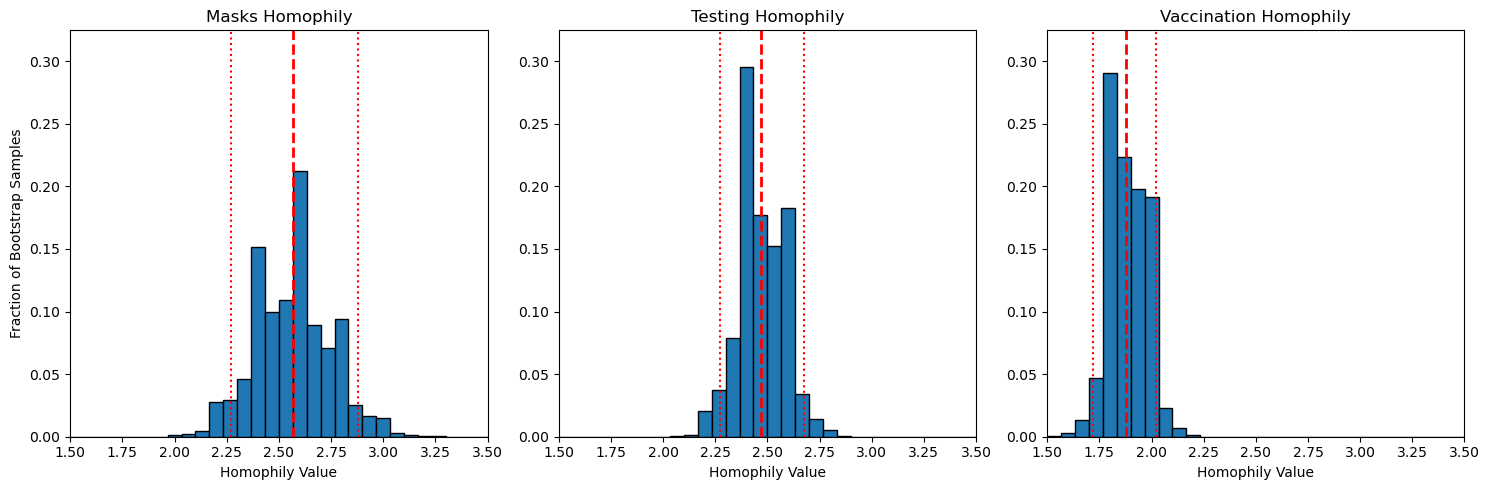

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the bootstrap values
masks_values = boot_hom_masks['bootstrap_homophily']
tests_values = boot_hom_tests['bootstrap_homophily']
vaccs_values = boot_hom_vaccs['bootstrap_homophily']

# Calculate means
masks_mean = np.mean(masks_values)
tests_mean = np.mean(tests_values)
vaccs_mean = np.mean(vaccs_values)

# Calculate 5-95 confidence intervals
masks_ci = np.percentile(masks_values, [5, 95])
tests_ci = np.percentile(tests_values, [5, 95])
vaccs_ci = np.percentile(vaccs_values, [5, 95])

# Create figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define common bins from 1.5 to 3.5
bins = np.linspace(1.5, 3.5, 31)  # 20 bins between 1.5 and 3.5

# Plot histograms with normalized counts (fraction of total samples)
# Count manually and normalize
masks_hist, _ = np.histogram(masks_values, bins=bins)
masks_hist = masks_hist / len(masks_values)

tests_hist, _ = np.histogram(tests_values, bins=bins)
tests_hist = tests_hist / len(tests_values)

vaccs_hist, _ = np.histogram(vaccs_values, bins=bins)
vaccs_hist = vaccs_hist / len(vaccs_values)

# Plot the normalized histograms
axs[0].bar(bins[:-1], masks_hist, width=np.diff(bins)[0], edgecolor='black', align='edge')
axs[0].set_title('Masks Homophily')
axs[0].set_xlabel('Homophily Value')
axs[0].set_ylabel('Fraction of Bootstrap Samples')
# Add mean and CI lines
axs[0].axvline(masks_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {masks_mean:.2f}')
axs[0].axvline(masks_ci[0], color='red', linestyle=':', linewidth=1.5, label=f'5%: {masks_ci[0]:.2f}')
axs[0].axvline(masks_ci[1], color='red', linestyle=':', linewidth=1.5, label=f'95%: {masks_ci[1]:.2f}')

axs[1].bar(bins[:-1], tests_hist, width=np.diff(bins)[0], edgecolor='black', align='edge')
axs[1].set_title('Testing Homophily')
axs[1].set_xlabel('Homophily Value')
# Add mean and CI lines
axs[1].axvline(tests_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {tests_mean:.2f}')
axs[1].axvline(tests_ci[0], color='red', linestyle=':', linewidth=1.5, label=f'5%: {tests_ci[0]:.2f}')
axs[1].axvline(tests_ci[1], color='red', linestyle=':', linewidth=1.5, label=f'95%: {tests_ci[1]:.2f}')

axs[2].bar(bins[:-1], vaccs_hist, width=np.diff(bins)[0], edgecolor='black', align='edge')
axs[2].set_title('Vaccination Homophily')
axs[2].set_xlabel('Homophily Value')
# Add mean and CI lines
axs[2].axvline(vaccs_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {vaccs_mean:.2f}')
axs[2].axvline(vaccs_ci[0], color='red', linestyle=':', linewidth=1.5, label=f'5%: {vaccs_ci[0]:.2f}')
axs[2].axvline(vaccs_ci[1], color='red', linestyle=':', linewidth=1.5, label=f'95%: {vaccs_ci[1]:.2f}')

# Add legends to each subplot
for ax in axs:
    ax.set_xlim(1.5, 3.5)
    #ax.legend(loc='upper right')

# Set consistent y-axis limits
y_max = max([np.max(masks_hist), np.max(tests_hist), np.max(vaccs_hist)]) * 1.1
for ax in axs:
    ax.set_ylim(0, y_max)

plt.tight_layout()
plt.show()


fig.savefig("figures/SI/bootstrap_homophily.pdf", bbox_inches='tight')
